In [4]:
import sys
import os
# Add the 'project' directory to the path
sys.path.append(os.path.abspath('..'))

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [6]:
pars_to_compare = ['z', '1-kap', 'v', 'p_M', 'E_Hb', 'E_Hp']

# Load results

In [12]:
#df = pd.read_csv('../data/raw/estimation_from_AmP_pars.csv', index_col=0)
#df = pd.read_csv('../data/estimation_runs/full_estimation_from_AmP_pars_subset_test_set.csv', index_col=0)
df = pd.read_csv('../data/estimation_runs/run_train_val_sets_until_minimum.csv', index_col=0)


df.index.name = 'species'
#df.drop(columns=['data_split'])
# Drop species that were not run yet -> execution_time == 0
df = df[df.execution_time > 0]
# Create columns for '1-kap'
df['1-kap_i'] = 1 - df['kap_i']
df['1-kap_f'] = 1 - df['kap_f']
# Convert boolean variables
df['convergence'] = df['convergence'].astype(bool)
df['error'] = df['error'].astype(bool)
# Fix error being false when an error message is logged
max_execution_time_error_message = "Maximum execution time exceeded"
df.loc[(~df['error_message'].isna()) & (df['error_message'] != max_execution_time_error_message), 'error'] = True
df


,init_loss,z_i,kap_i,v_i,p_M_i,E_Hb_i,E_Hp_i,final_loss,z_f,kap_f,...,E_Hb_f,E_Hp_f,convergence,n_runs,n_iter,execution_time,error,error_message,1-kap_i,1-kap_f
species,,,,,,,,,,,,,,,,,,,,,
Sepiella_inermis,0.466196,0.44409,0.73830,0.025902,882.4408,56.740,16330.0,0.422621,0.459775,0.746540,...,51.553179,17601.332536,True,7,3488,312.367851,False,NaN,0.26170,0.253460
Molothrus_bonariensis,0.142471,1.98650,0.82804,0.053568,687.9868,2176.000,30820.0,0.142409,1.982540,0.828091,...,2179.890185,30682.237689,False,1,500,54.134099,False,NaN,0.17196,0.171909
Xiphophorus_maculatus,0.348674,0.96488,0.57892,0.022653,287.8024,12.040,1646.0,0.348674,0.964848,0.578890,...,12.040168,1646.300480,False,1,500,23.895588,False,NaN,0.42108,0.421110
Cnidoglanis_macrocephalus,0.031688,9.23170,0.53392,0.025475,30.9836,148.300,579500.0,0.028419,8.944826,0.500467,...,162.263736,599751.616484,True,7,3472,175.172382,False,NaN,0.46608,0.499533
Pterodroma_macroptera,0.106618,3.38090,0.70578,0.019354,431.7192,24810.000,378600.0,0.106162,3.393576,0.710344,...,24318.553530,371023.167068,False,2,1000,62.634009,False,NaN,0.29422,0.289656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Necturus_maculosus,0.027036,7.44410,0.95885,0.020755,25.7368,12.620,19060.0,0.027036,7.443213,0.958843,...,12.617923,19068.619828,False,1,500,13.794529,False,NaN,0.04115,0.041157
Ninox_strenua,0.099075,4.84880,0.97097,0.027584,361.1986,1778.000,63880.0,0.098623,4.832047,0.968549,...,1954.426966,70353.918986,False,3,1500,75.253592,False,NaN,0.02903,0.031451
Gymnocephalus_cernuus,0.058053,1.09970,0.45319,0.032558,21.1355,2.461,39100.0,0.055428,1.103085,0.451374,...,2.473616,37196.307719,False,2,1000,62.894842,False,NaN,0.54681,0.548626


In [13]:
# Convert final_loss column to complex type if it is of type object
if df['final_loss'].dtype == np.dtype('O'):
    df['final_loss'] = df['final_loss'].apply(lambda x: complex(x.replace('i', 'j')) if isinstance(x, str) else x)

# Set error if loss is imaginary
imaginary_loss_mask = df['final_loss'].apply(lambda x: x.imag != 0 if isinstance(x, complex) else False)
df.loc[imaginary_loss_mask, 'error'] = True
df.loc[imaginary_loss_mask, 'error_message'] = 'Final loss has imaginary part'

# Convert final_loss column to complex type if it is of type object
if df['init_loss'].dtype == np.dtype('O'):
    df['init_loss'] = df['init_loss'].apply(lambda x: complex(x.replace('i', 'j')) if isinstance(x, str) else x)

# Set error if loss is imaginary
imaginary_loss_mask = df['init_loss'].apply(lambda x: x.imag != 0 if isinstance(x, complex) else False)
df.loc[imaginary_loss_mask, 'error'] = True
df.loc[imaginary_loss_mask, 'error_message'] = 'Initial loss has imaginary part'

C:\Users\dmoliveira\AppData\Local\Temp\ipykernel_26712\1039066176.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Final loss has imaginary part' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[imaginary_loss_mask, 'error_message'] = 'Final loss has imaginary part'


In [14]:
print(f"{df['convergence'].sum()} out of {len(df)} species converged ({df['convergence'].sum()/len(df)*100:.2f}%)")
print(f"{df['error'].sum()} out of {len(df)} species threw an error ({df['error'].sum()/len(df)*100:.2f}%)")

12 out of 123 species converged (9.76%)
0 out of 123 species threw an error (0.00%)


In [40]:
df['error_message'].value_counts()

error_message
The logical indices contain a true value outside of the array bounds.    2
Arrays have incompatible sizes for this operation.                       1
Maximum execution time exceeded                                          1
Final loss has an imaginary part                                         1
Name: count, dtype: int64

df[~df['error_message'].isna()]['error_message']

# Analysis 

In [10]:
# Remove species with errors
par_gap_cols = [p+'_gap' for p in pars_to_compare]
gap_df = pd.DataFrame(index=df[df['error_message'].isna()].index, columns=['loss_diff', 'loss_gap'] + par_gap_cols)
gap_df['loss_diff'] = df['init_loss'] - df['final_loss']
gap_df['loss_gap'] = (df['init_loss'] - df['final_loss']) / df['init_loss'] * 100
for p in pars_to_compare:
    gap_df[p+'_gap'] = (df[f"{p}_i"] - df[f"{p}_f"]).abs() / df[f"{p}_i"]
gap_df['par_dist_metric'] = gap_df[par_gap_cols].sum(axis=1)
gap_df

,loss_diff,loss_gap,z_gap,1-kap_gap,v_gap,p_M_gap,E_Hb_gap,E_Hp_gap,par_dist_metric
species,,,,,,,,,
Rogadius_asper,6.589531e-04,1.255591,0.001417,0.000000,0.020578,0.004313,0.028710,0.005964,0.060982
Glyptemys_insculpta,1.472360e-07,0.000144,0.000051,0.000375,0.000172,0.000066,0.000440,0.000190,0.001294
Chaetura_vauxi,6.352123e-02,58.744044,1.079640,0.126309,1.827493,0.975348,3.945308,0.286593,8.240692
Tyrannus_melancholicus,4.816685e-04,0.368441,0.007659,0.015963,0.021363,0.008804,0.007930,0.014688,0.076407
Diomedea_exulans,1.568776e-03,1.371809,0.003706,0.003245,0.001284,0.026738,0.002116,0.009219,0.046308
...,...,...,...,...,...,...,...,...,...
Platax_orbicularis,9.615282e-05,0.056264,0.000065,0.004938,0.000067,0.000042,0.000067,0.000448,0.005626
Vermivora_cyanoptera,1.285321e-02,11.167156,0.316776,0.496826,0.341079,2.455000,0.271218,0.419947,4.300846
Aythya_valisineria,3.018780e-03,2.407908,0.008089,0.014820,0.035854,0.024112,0.026571,0.028416,0.137862


## Loss improvement

Text(0.5, 0, 'Relative improvement in loss (%)')

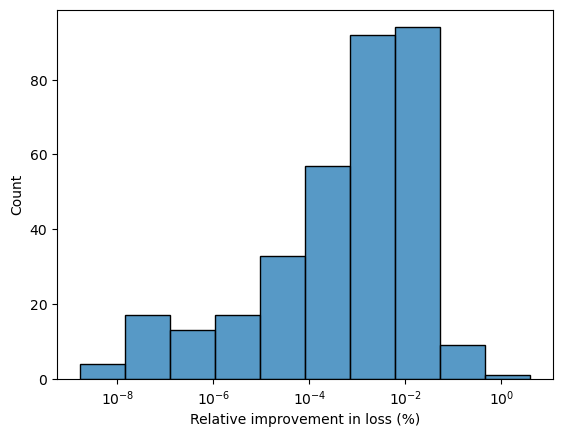

In [11]:
fig, ax = plt.subplots()
sns.histplot(gap_df['loss_diff'], bins=10, kde=False, ax=ax, log_scale=True)
ax.set_xlabel('Relative improvement in loss (%)')

In [75]:
loss_gap_cutoff = 1 # in percentage
n_species_below_cutoff = (gap_df['loss_gap'] < loss_gap_cutoff).sum()
print(f"There are {n_species_below_cutoff} ({n_species_below_cutoff/len(gap_df)*100:.2f} %) species with a loss improvement < {loss_gap_cutoff} %")

There are 0 (0.00 %) species with a loss improvement < 1 %


In [32]:
(gap_df['loss_gap'] > 10).sum()

np.int64(585)

## Worst species

In [33]:
print("nm = { ...")
for s, lg in gap_df.loc[gap_df['loss_gap'] > 80, 'loss_gap'].items():
    if lg < 90:
        print(f"'{s}'")
print("};")

nm = { ...
'Amphioctopus_fangsiao'
'Arius_maculatus'
'Brachidontes_pharaonis'
'Caranx_ignobilis'
'Carcharodon_carcharias'
'Chrysichthys_walkeri'
'Clupisoma_garua'
'Cynoglossus_senegalensis'
'Electrophorus_electricus'
'Epinephelus_aeneus'
'Galeoides_decadactylus'
'Genypterus_chilensis'
'Glaucomys_volans'
'Hyla_annectans'
'Liparis_gibbus'
'Lynx_lynx'
'Macquaria_novemaculeata'
'Molva_dypterygia'
'Mytilaster_minimus'
'Ocyurus_chrysurus'
'Oligosarcus_hepsetus'
'Ophiura_albida'
'Pellona_ditchela'
'Ranodon_sibiricus'
'Rhynchorhamphus_georgii'
'Sardinella_lemuru'
'Sepia_apama'
'Siphateles_bicolor'
'Sphenodon_punctatus'
};


In [34]:
for s, lg in gap_df['loss_gap'].sort_values(ascending=False).items():
    print(f"{s}: {lg:.2f}%")

Tenualosa_reevesii: 98.55%
Cynoscion_jamaicensis: 97.01%
Euprymna_hyllebergi: 96.11%
Parupeneus_forsskali: 95.58%
Erilepis_zonifer: 95.42%
Abraliopsis_morisii: 95.28%
Muusoctopus_rigbyae: 93.48%
Brevoortia_tyrannus: 93.44%
Ameiurus_catus: 92.78%
Rhabdosargus_haffara: 90.22%
Hyla_annectans: 89.74%
Liparis_gibbus: 88.95%
Caranx_ignobilis: 88.84%
Brachidontes_pharaonis: 88.81%
Clupisoma_garua: 88.12%
Amphioctopus_fangsiao: 87.74%
Cynoglossus_senegalensis: 87.73%
Galeoides_decadactylus: 87.01%
Electrophorus_electricus: 86.84%
Pellona_ditchela: 86.76%
Sepia_apama: 86.67%
Oligosarcus_hepsetus: 85.95%
Rhynchorhamphus_georgii: 85.85%
Ocyurus_chrysurus: 85.43%
Ranodon_sibiricus: 84.32%
Carcharodon_carcharias: 83.68%
Ophiura_albida: 83.37%
Glaucomys_volans: 82.56%
Epinephelus_aeneus: 82.55%
Sphenodon_punctatus: 81.99%
Sardinella_lemuru: 81.60%
Mytilaster_minimus: 81.54%
Arius_maculatus: 81.35%
Lynx_lynx: 81.19%
Macquaria_novemaculeata: 81.14%
Chrysichthys_walkeri: 80.92%
Siphateles_bicolor: 80.6

## Parameter differences

Text(0.5, 0, 'Parameter distance metric')

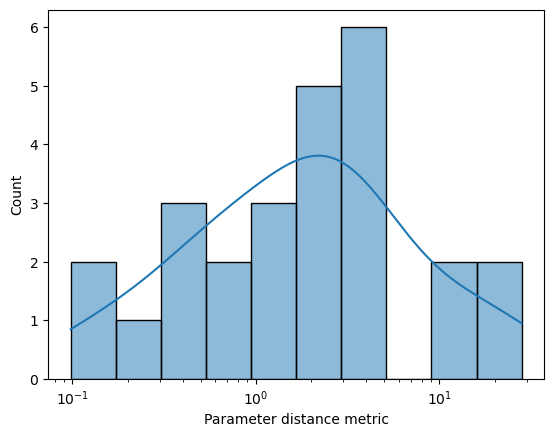

In [80]:
fig, ax = plt.subplots()
sns.histplot(gap_df['par_dist_metric'], bins=10, kde=True, ax=ax, log_scale=True)
ax.set_xlabel('Parameter distance metric')

c:\Users\diogo\miniconda3\envs\ml_bijection\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\diogo\miniconda3\envs\ml_bijection\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


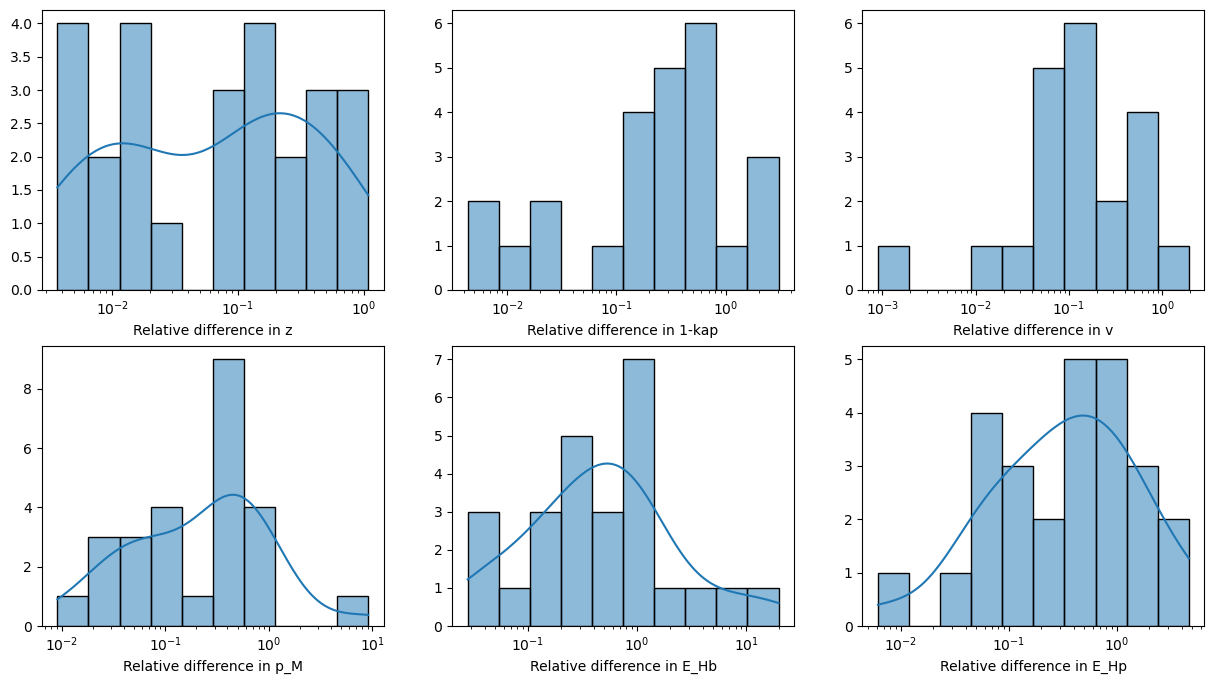

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, par in enumerate(pars_to_compare):
    ax = axes[i // 3, i % 3]
    sns.histplot(gap_df[par+'_gap'], bins=10, kde=True, ax=ax, log_scale=True)
    ax.set_xlabel(f'Relative difference in {par}')
    ax.set_ylabel('')

In [37]:
gap_df.describe()

,loss_diff,loss_gap,z_gap,1-kap_gap,v_gap,p_M_gap,E_Hb_gap,E_Hp_gap,par_dist_metric
count,5.121000e+03,5.121000e+03,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000
mean,2.847881e-02,4.941201e+00,0.028729,0.053204,0.044965,0.082567,0.106566,0.082008,0.398039
std,4.274637e-01,1.271339e+01,0.066002,0.263635,0.095659,0.481070,0.829758,0.241604,1.473221
min,8.462860e-10,2.095524e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.655438e-05,7.322155e-02,0.000886,0.001529,0.001096,0.001890,0.003386,0.003692,0.026934
50%,8.283345e-04,6.615309e-01,0.005470,0.012076,0.011495,0.014468,0.022856,0.022545,0.132340
75%,3.407621e-03,2.854519e+00,0.024648,0.050623,0.047928,0.064015,0.091877,0.078681,0.407724
max,2.190917e+01,9.855487e+01,1.336836,16.051026,1.663520,31.698460,56.655950,10.312517,74.335464


Text(0, 0.5, 'Parameter distance metric')

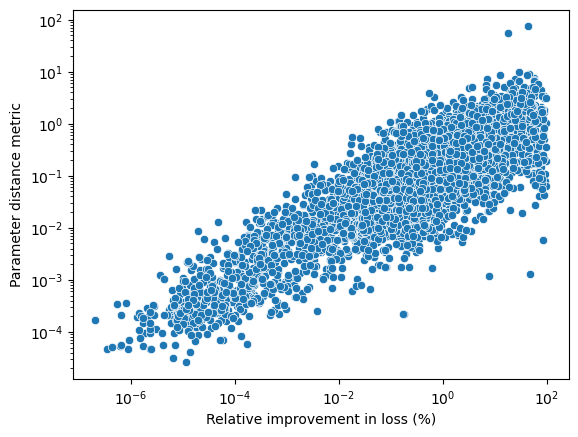

In [38]:
ax = sns.scatterplot(data=gap_df, x='loss_gap', y='par_dist_metric')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Relative improvement in loss (%)')
ax.set_ylabel('Parameter distance metric')

## Specific cases to investigate

###  Species in test set

In [39]:
test_set_df = pd.read_csv(f"../data/processed/all_constraints_no_pub_age_taxonomy_ecocodes/test.csv", index_col=0)
test_set_df

,ab,am,d_V,Wwb,Wwp,Wwi,Ri,T_typical,metamorphosis,weaning,...,habitat_T,habitat_F,habitat_S,habitat_M,migrate_T,food_other,food_P,food_O,food_H,food_C
species,,,,,,,,,,,,,,,,,,,,,
Rogadius_asper,2.531136,1478.1840,0.20,0.000065,5.243514,180.00,649.445700,300.65,True,False,...,False,False,False,True,False,False,True,False,False,True
Glyptemys_insculpta,40.861320,35163.9300,0.30,4.500000,618.710300,1600.00,0.020476,288.15,False,False,...,True,True,False,False,False,False,False,False,True,True
Chaetura_vauxi,3.878755,312.2469,0.28,1.500000,19.190000,20.20,0.097999,311.25,False,False,...,True,False,False,False,False,False,False,False,False,True
Tyrannus_melancholicus,3.164247,492.7286,0.28,3.400000,36.860000,38.80,0.067583,314.75,False,False,...,True,False,False,False,False,False,False,False,True,True
Diomedea_exulans,16.229530,3257.2170,0.28,379.000000,14250.000000,15000.00,0.009210,312.55,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Platax_orbicularis,0.578483,3167.1930,0.20,0.001200,315.000000,8287.00,18944.220000,299.15,True,False,...,False,False,False,True,False,False,True,False,False,True
Vermivora_cyanoptera,2.653885,399.5097,0.28,1.500000,8.170000,8.60,0.112638,314.75,False,False,...,True,False,False,False,False,False,False,False,False,True
Aythya_valisineria,4.609172,1358.0280,0.28,44.800000,1094.400000,1152.00,0.195504,314.35,False,False,...,False,True,False,False,False,False,False,False,True,True


In [42]:
test_set_gap_df = gap_df.loc[gap_df.index.intersection(test_set_df.index)]
test_set_gap_df

,loss_diff,loss_gap,z_gap,1-kap_gap,v_gap,p_M_gap,E_Hb_gap,E_Hp_gap,par_dist_metric
species,,,,,,,,,
Acanthisitta_chloris,2.530517e-04,0.264873,0.002091,0.001859,0.002751,0.017343,0.002437,0.003506,0.029986
Acanthiza_inornata,6.060272e-04,0.605361,0.000720,0.009382,0.012974,0.014966,0.013034,0.031254,0.082330
Acanthoclinus_littoreus,3.244069e-04,4.931577,0.012487,0.066578,0.000000,0.039863,0.111170,0.079958,0.310056
Acanthodactylus_harranensis,3.694551e-08,0.000110,0.000011,0.000044,0.000045,0.000052,0.000084,0.000082,0.000317
Accipiter_cooperii,1.544584e-03,1.079867,0.012503,0.008529,0.058474,0.011133,0.052697,0.073926,0.217261
...,...,...,...,...,...,...,...,...,...
Zenaida_macroura,1.001414e-03,0.871302,0.053012,0.009837,0.053144,0.186678,0.092911,0.119498,0.515080
Zhangixalus_omeimontis,1.019093e-03,0.855364,0.031754,0.008409,0.030581,0.097731,0.002827,0.317621,0.488923
Ziphius_cavirostris,1.076325e-03,3.719942,0.016439,0.102978,0.059524,0.054413,0.009045,0.039692,0.282092


Text(0.5, 0, 'Relative improvement in loss (%)')

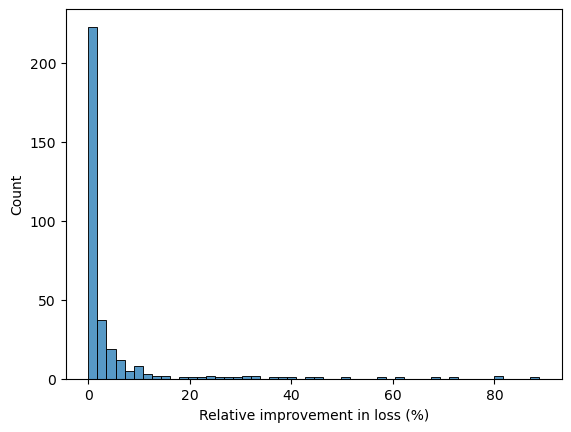

In [46]:
fig, ax = plt.subplots()
sns.histplot(test_set_gap_df['loss_gap'], bins=50, kde=False, ax=ax)
ax.set_xlabel('Relative improvement in loss (%)')

In [66]:
subset_df = test_set_gap_df.loc[(test_set_gap_df['loss_diff'] > 1e-6) & (test_set_gap_df['loss_gap'] > 10)].sort_values('loss_diff', ascending=False)
print(len(subset_df))

36


In [69]:
list_of_species_already_at_minimum = [
        'Siphateles_bicolor',
        'Macquaria_novemaculeata',
        'Prionotus_albirostris',
        'Decapterus_macrosoma',
        'Etropus_crossotus',
        'Myripristis_murdjan',
        'Cerastoderma_edule',
        'Acipenser_stellatus',
        'Mormyrus_kannume',
        'Mysis_mixta',    
]
print("speciesList = {", end="")
for s, lg in subset_df['loss_gap'].items():
    if s in list_of_species_already_at_minimum:
        continue
    print(f"'{s}'", end=", ")
print("};")

speciesList = {'Caenorhabditis_elegans', 'Caranx_ignobilis', 'Geococcyx_californianus', 'Torpedo_marmorata', 'Pleurobrachia_pileus', 'Turdus_merula', 'Gallotia_galloti', 'Diplectrum_formosum', 'Octopus_joubini', 'Myiarchus_cinerascens', 'Somateria_mollissima', 'Paranotothenia_magellanica', 'Sillago_sihama', 'Stolephorus_waitei', 'Rhombosolea_plebeia', 'Pseudopleuronectes_yokohamae', 'Microcondylaea_bonellii', 'Trichiurus_lepturus', 'Aerodramus_fuciphagus', 'Sula_dactylatra', 'Scomberomorus_maculatus', 'Macquaria_ambigua', 'Apteryx_mantelli', 'Anchoa_panamensis', 'Synodontis_nebulosus', 'Euthynnus_alletteratus', };
